In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import matplotlib
import splinelib as tsp

(400, 2) (400, 1)


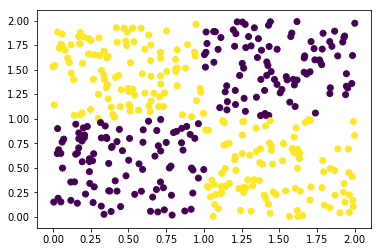

In [36]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y).reshape(-1,1)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [37]:
colors = ['r', 'y', 'g', 'b']

### Building model 2-->N spline units added together

In [38]:
max_points = 5
n_hidden = 5
lr=0.1

spline1 = tsp.SplineMatrixLayer(2, n_hidden, max_points)
sigmoid = tnn.Sigmoid()

In [39]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = spline1.forward(x)
    a2 = a1.sum(axis=1, keepdims=True)
    yout = sigmoid.forward(a2)
    dy = yout-y
    
    da2 = sigmoid.backward(dy)
    da1 = np.hstack([da2]*n_hidden)
    dx = spline1.backward(da1)

    spline1.update(lr)
    
    if step % 100 == 0:
        spline1._maintain_good_spline_()
            
    if step % 100 == 0:
            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        out = (yout>0.5).astype(int)
        plt.scatter(x[:,0], x[:, 1], c=yout.reshape(-1))
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

_______________________
Steps 0
Error 0.3711276763090905


_______________________
Steps 100
Error 0.2943889334313619


_______________________
Steps 200
Error 0.28401154800765427


_______________________
Steps 300
Error 0.2719770252057096


_______________________
Steps 400
Error 0.27413983587077445


_______________________
Steps 500
Error 0.2598234900714511


_______________________
Steps 600
Error 0.2530728680577336


_______________________
Steps 700
Error 0.24576212557489258


_______________________
Steps 800
Error 0.24257347085517914


_______________________
Steps 900
Error 0.24048017977528907


_______________________
Steps 1000
Error 0.24037819486627968


_______________________
Steps 1100
Error 0.23849084713687738


_______________________
Steps 1200
Error 0.2379318855907926


_______________________
Steps 1300
Error 0.23757441123506204


_______________________
Steps 1400
Error 0.23726114275946453


_______________________
Steps 1500
Error 0.23709968302787313


__________

TclError: invalid command name "pyimage297"

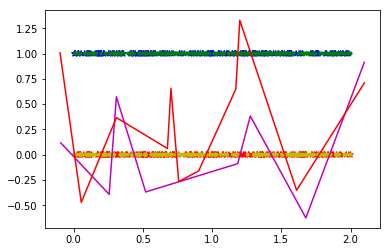

In [8]:
%matplotlib inline
x1, x2 = x_[:, 0], x_[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
# Y = Y1+Y2
Y = sigmoid.forward(Y1+Y2)
out = (Y>0.5).astype(int)

plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

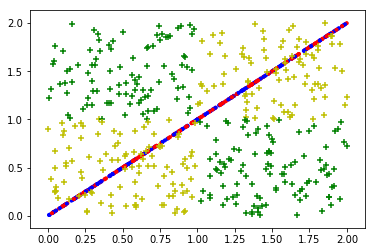

In [9]:
plt.scatter(x[:,0], x1, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x1, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

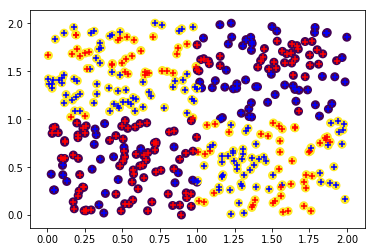

In [10]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=3)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

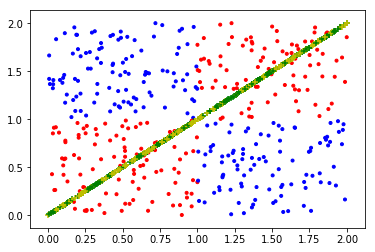

In [11]:
plt.scatter(x[:,0], x2, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x2, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

In [12]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

x_ = xxyy
x1, x2 = x_[:, 0], x_[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
Y = sigmoid.forward(Y1+Y2)
out = (Y>0.5).astype(int)

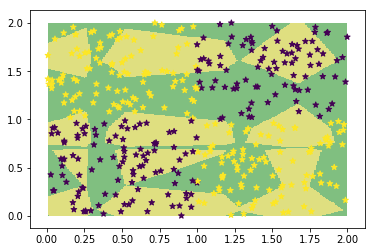

In [13]:
plt.imshow(out.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')